In [2]:
!pip install scikit-learn-extra
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans

In [4]:
ds = pd.read_csv('https://raw.githubusercontent.com/ali-murtadho/tsa-ml-project/master/data_banjir_clean.csv')
ds

,kota_administrasi,kecamatan,kelurahan,rw,tahun,bulan,lama_genangan,tanggal_kejadian,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,ketinggian_air,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,date,total_kejadian,total_rw
0,Jakarta Timur,Jatinegara,Bidara Cina,"01,02,03,05,06,07,10,11,12,14,15",2013,1,13,"9,10,11,16,17,18,19,20,21,22,23,24,25",95,0,0,20-250,1,20.0,250.0,135.0,01-2013,13,11
1,Jakarta Timur,Jatinegara,Kampung Melayu,"01,02,03,04,05,06,07,08",2013,1,13,"9,10,11,16,17,18,19,20,21,22,23,24,25",69,0,0,30-400,5,30.0,400.0,215.0,01-2013,13,8
2,Jakarta Timur,Kramat Jati,Cawang,"01,02,03,04,05,06,8,12",2013,1,9,"9,10,11,16,17,18,19,20,21",27,0,0,30-260,0,30.0,260.0,145.0,01-2013,9,8
3,Jakarta Timur,Kramat Jati,Cililitan,"05,06,07,15,16",2013,1,10,"16,17,18,19,20,21,23,24,26,27",40,0,0,40-300,0,40.0,300.0,170.0,01-2013,10,5
4,Jakarta Timur,Kramat Jati,Balekambang,"01,02,04,05",2013,1,3,"17,18,19",17,0,0,30-150,0,30.0,150.0,90.0,01-2013,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,2020,12,0,15,0,0,0,10-15,0,10.0,15.0,12.5,12-2020,1,1
2436,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,2020,12,0,15,0,0,0,5-20,0,5.0,20.0,12.5,12-2020,1,1
2437,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,2020,12,0,15,0,0,0,15,0,15.0,15.0,15.0,12-2020,1,1
2438,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,02,2020,12,0,15,0,0,0,5,0,5.0,5.0,5.0,12-2020,1,1


In [5]:
print("============= Kolom =============")
print(ds.columns)
print("================================= \n")
print("============= Dimensi =============")
print(ds.shape)
print("================================= \n")
print("============= Describe Numerik =============")
print(ds.describe())
print("================================= \n")
print("============= Describe Kategorik =============")
print(ds.describe(include=['object']))
print("================================= \n")
print("============= Missing Data =============")
print(ds.isnull().sum())
print("================================= \n")
print("============= Duplicated Data =============")
print(ds.duplicated().sum())
print("================================= \n")
print("============= Tipe data =============")
print(ds.info())
print("================================= \n")


============= Kolom =============
Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw', 'tahun', 'bulan',
       'lama_genangan', 'tanggal_kejadian', 'jumlah_tempat_pengungsian',
       'jumlah_luka_ringan', 'jumlah_luka_berat', 'ketinggian_air',
       'jumlah_meninggal', 'ketinggian_air_minimal', 'ketinggian_air_maksimal',
       'avg_ketinggian_air', 'date', 'total_kejadian', 'total_rw'],
      dtype='object')

============= Dimensi =============
(2440, 19)

============= Describe Numerik =============
             tahun        bulan  lama_genangan  jumlah_tempat_pengungsian  \
count  2440.000000  2440.000000    2440.000000                2440.000000   
mean   2017.430328     5.286066       1.389344                   1.150000   
std       2.585334     4.000222       2.612309                  10.159836   
min    2013.000000     1.000000       0.000000                   0.000000   
25%    2015.000000     2.000000       0.000000                   0.000000   
50%    2018.000000   

In [6]:
# Melihat data yang hilang pada kolom 'ketinggian_air_minimal'
missing_ketinggian_air_minimal = ds[ds['ketinggian_air_minimal'].isna()]
print("Data yang hilang pada 'ketinggian_air_minimal':")
print(missing_ketinggian_air_minimal)

# Melihat data yang hilang pada kolom 'ketinggian_air_maksimal'
missing_ketinggian_air_maksimal = ds[ds['ketinggian_air_maksimal'].isna()]
print("Data yang hilang pada 'ketinggian_air_maksimal':")
print(missing_ketinggian_air_maksimal)

# Melihat data yang hilang pada kolom 'avg_ketinggian_air'
missing_avg_ketinggian_air = ds[ds['avg_ketinggian_air'].isna()]
print("Data yang hilang pada 'avg_ketinggian_air':")
print(missing_avg_ketinggian_air)


Data yang hilang pada 'ketinggian_air_minimal':
    kota_administrasi         kecamatan     kelurahan  rw  tahun  bulan  \
982   Jakarta Selatan  MAMPANG PRAPATAN        BANGKA  30   2017      2   
984     Jakarta Utara              KOJA  TUGU SELATAN  30   2017      2   

     lama_genangan tanggal_kejadian  jumlah_tempat_pengungsian  \
982              0              1.0                          0   
984              0              1.0                          0   

     jumlah_luka_ringan  jumlah_luka_berat ketinggian_air  jumlah_meninggal  \
982                   0                  0    19,21-22,26                 0   
984                   0                  0       16,21-22                 0   

     ketinggian_air_minimal  ketinggian_air_maksimal  avg_ketinggian_air  \
982                     NaN                      NaN                 NaN   
984                     NaN                     22.0                 NaN   

        date  total_kejadian  total_rw  
982  02-2017       

In [7]:
ds = ds.dropna(subset=['kecamatan', 'kelurahan', 'ketinggian_air_maksimal', 'avg_ketinggian_air', 'ketinggian_air_minimal'])

In [8]:
print("============= Kolom =============")
print(ds.columns)
print("================================= \n")
print("============= Dimensi =============")
print(ds.shape)
print("================================= \n")
print("============= Describe Numerik =============")
print(ds.describe())
print("================================= \n")
print("============= Describe Kategorik =============")
print(ds.describe(include=['object']))
print("================================= \n")
print("============= Missing Data =============")
print(ds.isnull().sum())
print("================================= \n")
print("============= Tipe data =============")
print(ds.info())
print("================================= \n")


============= Kolom =============
Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw', 'tahun', 'bulan',
       'lama_genangan', 'tanggal_kejadian', 'jumlah_tempat_pengungsian',
       'jumlah_luka_ringan', 'jumlah_luka_berat', 'ketinggian_air',
       'jumlah_meninggal', 'ketinggian_air_minimal', 'ketinggian_air_maksimal',
       'avg_ketinggian_air', 'date', 'total_kejadian', 'total_rw'],
      dtype='object')

============= Dimensi =============
(2435, 19)

============= Describe Numerik =============
             tahun        bulan  lama_genangan  jumlah_tempat_pengungsian  \
count  2435.000000  2435.000000    2435.000000                2435.000000   
mean   2017.433676     5.292402       1.389733                   1.151129   
std       2.586073     4.001839       2.613499                  10.170090   
min    2013.000000     1.000000       0.000000                   0.000000   
25%    2015.000000     2.000000       0.000000                   0.000000   
50%    2018.000000   

In [9]:
print("============= Kolom Unik =============")
# Mencari nilai unik pada setiap kolom
for kolom in ds.columns:
    banyak_unik = ds[kolom].nunique()
    nilai_unik = ds[kolom].unique()
    print(f'"{kolom}": {banyak_unik}')
    print(f'{nilai_unik}')

        # Mencetak value counts untuk setiap data yang unik di kolom
    for nilai in nilai_unik:
        counts = ds[kolom].value_counts()[nilai]
        print(f'Value counts untuk {nilai}: {counts} \n')
print("================================= \n")

Output streaming akan dipotong hingga 5000 baris terakhir.

Value counts untuk JATI PULO: 3 

Value counts untuk PANGADEGAN: 1 

Value counts untuk RAWA JATI: 1 

Value counts untuk LENTENG AGUNG: 2 

Value counts untuk SRENGSENG SAWAH: 2 

Value counts untuk CAKUNG BARAT: 4 

Value counts untuk JATINEGARA: 4 

Value counts untuk BALE KAMBANG: 3 

Value counts untuk GEDONG: 4 

Value counts untuk KEBON MANGGIS: 4 

Value counts untuk KEL. RAGUNAN: 1 

Value counts untuk KEL. DUREN TIGA: 3 

Value counts untuk KEL. RAWAJATI: 4 

Value counts untuk KEL. PENGADEGAN: 4 

Value counts untuk KEL. CIPETE SELATAN: 1 

Value counts untuk KEL. KEBON BARU: 3 

Value counts untuk KEL. BIDARA CINA: 9 

Value counts untuk KEL. CILILITAN: 4 

Value counts untuk KEL. KAMAL MUARA: 3 

Value counts untuk KEL. KAMAL: 4 

Value counts untuk KEL. GANDARIA SELATAN: 1 

Value counts untuk KEL. ULUJAMI: 2 

Value counts untuk KEL. JATINEGARA: 2 

Value counts untuk KEL. RAWA TERATE: 4 

Value counts untuk KEL

In [10]:
ds.head()

,kota_administrasi,kecamatan,kelurahan,rw,tahun,bulan,lama_genangan,tanggal_kejadian,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,ketinggian_air,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,date,total_kejadian,total_rw
0,Jakarta Timur,Jatinegara,Bidara Cina,"01,02,03,05,06,07,10,11,12,14,15",2013,1,13,"9,10,11,16,17,18,19,20,21,22,23,24,25",95,0,0,20-250,1,20.0,250.0,135.0,01-2013,13,11
1,Jakarta Timur,Jatinegara,Kampung Melayu,"01,02,03,04,05,06,07,08",2013,1,13,"9,10,11,16,17,18,19,20,21,22,23,24,25",69,0,0,30-400,5,30.0,400.0,215.0,01-2013,13,8
2,Jakarta Timur,Kramat Jati,Cawang,"01,02,03,04,05,06,8,12",2013,1,9,"9,10,11,16,17,18,19,20,21",27,0,0,30-260,0,30.0,260.0,145.0,01-2013,9,8
3,Jakarta Timur,Kramat Jati,Cililitan,"05,06,07,15,16",2013,1,10,"16,17,18,19,20,21,23,24,26,27",40,0,0,40-300,0,40.0,300.0,170.0,01-2013,10,5
4,Jakarta Timur,Kramat Jati,Balekambang,"01,02,04,05",2013,1,3,"17,18,19",17,0,0,30-150,0,30.0,150.0,90.0,01-2013,3,4


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2439
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kota_administrasi          2435 non-null   object 
 1   kecamatan                  2435 non-null   object 
 2   kelurahan                  2435 non-null   object 
 3   rw                         2435 non-null   object 
 4   tahun                      2435 non-null   int64  
 5   bulan                      2435 non-null   int64  
 6   lama_genangan              2435 non-null   int64  
 7   tanggal_kejadian           2435 non-null   object 
 8   jumlah_tempat_pengungsian  2435 non-null   int64  
 9   jumlah_luka_ringan         2435 non-null   int64  
 10  jumlah_luka_berat          2435 non-null   int64  
 11  ketinggian_air             2435 non-null   object 
 12  jumlah_meninggal           2435 non-null   int64  
 13  ketinggian_air_minimal     2435 non-null   float

In [12]:
unussed_cols = ['rw', 'tanggal_kejadian',
       'ketinggian_air', 'date', 'bulan', 'tahun']

In [13]:
# Menghapus kolom-kolom yang ada dalam daftar
df = ds.drop(columns=unussed_cols)
df

,kota_administrasi,kecamatan,kelurahan,lama_genangan,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,total_kejadian,total_rw
0,Jakarta Timur,Jatinegara,Bidara Cina,13,95,0,0,1,20.0,250.0,135.0,13,11
1,Jakarta Timur,Jatinegara,Kampung Melayu,13,69,0,0,5,30.0,400.0,215.0,13,8
2,Jakarta Timur,Kramat Jati,Cawang,9,27,0,0,0,30.0,260.0,145.0,9,8
3,Jakarta Timur,Kramat Jati,Cililitan,10,40,0,0,0,40.0,300.0,170.0,10,5
4,Jakarta Timur,Kramat Jati,Balekambang,3,17,0,0,0,30.0,150.0,90.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,0,0,0,10.0,15.0,12.5,1,1
2436,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,0,0,0,5.0,20.0,12.5,1,1
2437,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,0,0,0,15.0,15.0,15.0,1,1
2438,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,0,0,0,5.0,5.0,5.0,1,1


In [14]:
enc = LabelEncoder()
df['kecamatan'] = enc.fit_transform(df['kecamatan'])
df['kelurahan'] = enc.fit_transform(df['kelurahan'])
df['kota_administrasi'] = enc.fit_transform(df['kota_administrasi'])

In [15]:
df.dtypes

kota_administrasi              int64
kecamatan                      int64
kelurahan                      int64
lama_genangan                  int64
jumlah_tempat_pengungsian      int64
jumlah_luka_ringan             int64
jumlah_luka_berat              int64
jumlah_meninggal               int64
ketinggian_air_minimal       float64
ketinggian_air_maksimal      float64
avg_ketinggian_air           float64
total_kejadian                 int64
total_rw                       int64
dtype: object

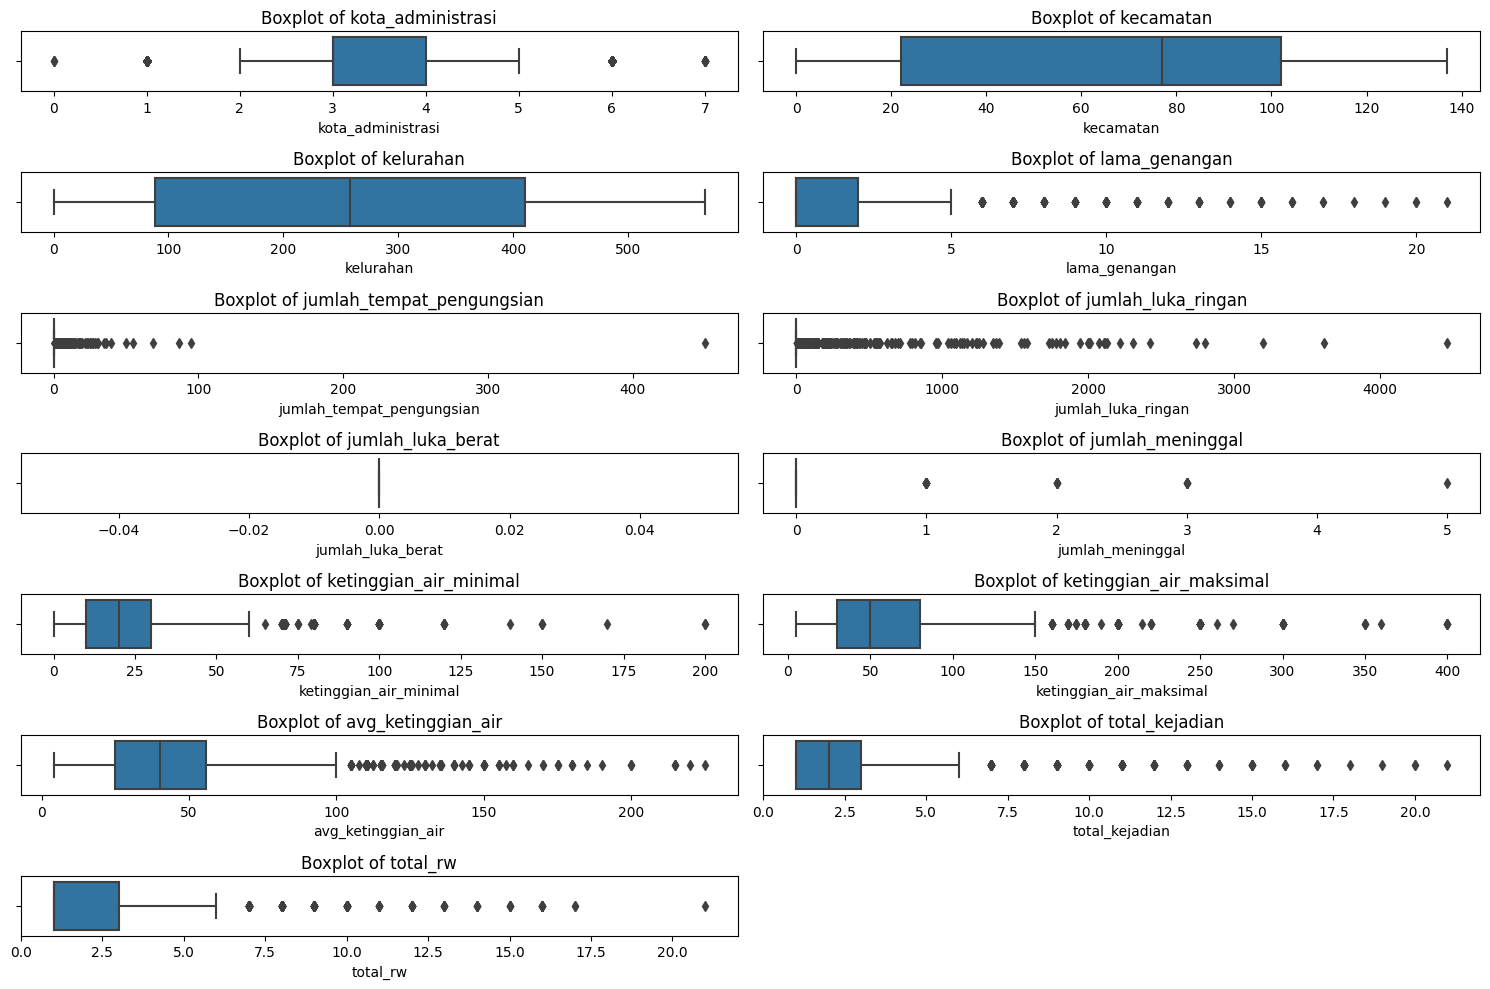

In [16]:
# Menghitung jumlah kolom dalam dataset
num_cols = len(df.columns)

# Menghitung jumlah baris dan kolom yang diperlukan untuk subplot
num_rows = num_cols // 2
if num_cols % 2 != 0:
    num_rows += 1

# Membuat subplot dengan ukuran yang sesuai
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)  # Buat subplot
    sns.boxplot(x=df[column])  # Visualisasikan boxplot
    plt.title(f'Boxplot of {column}')  # Beri judul subplot

# Menampilkan plot
plt.tight_layout()
plt.show()


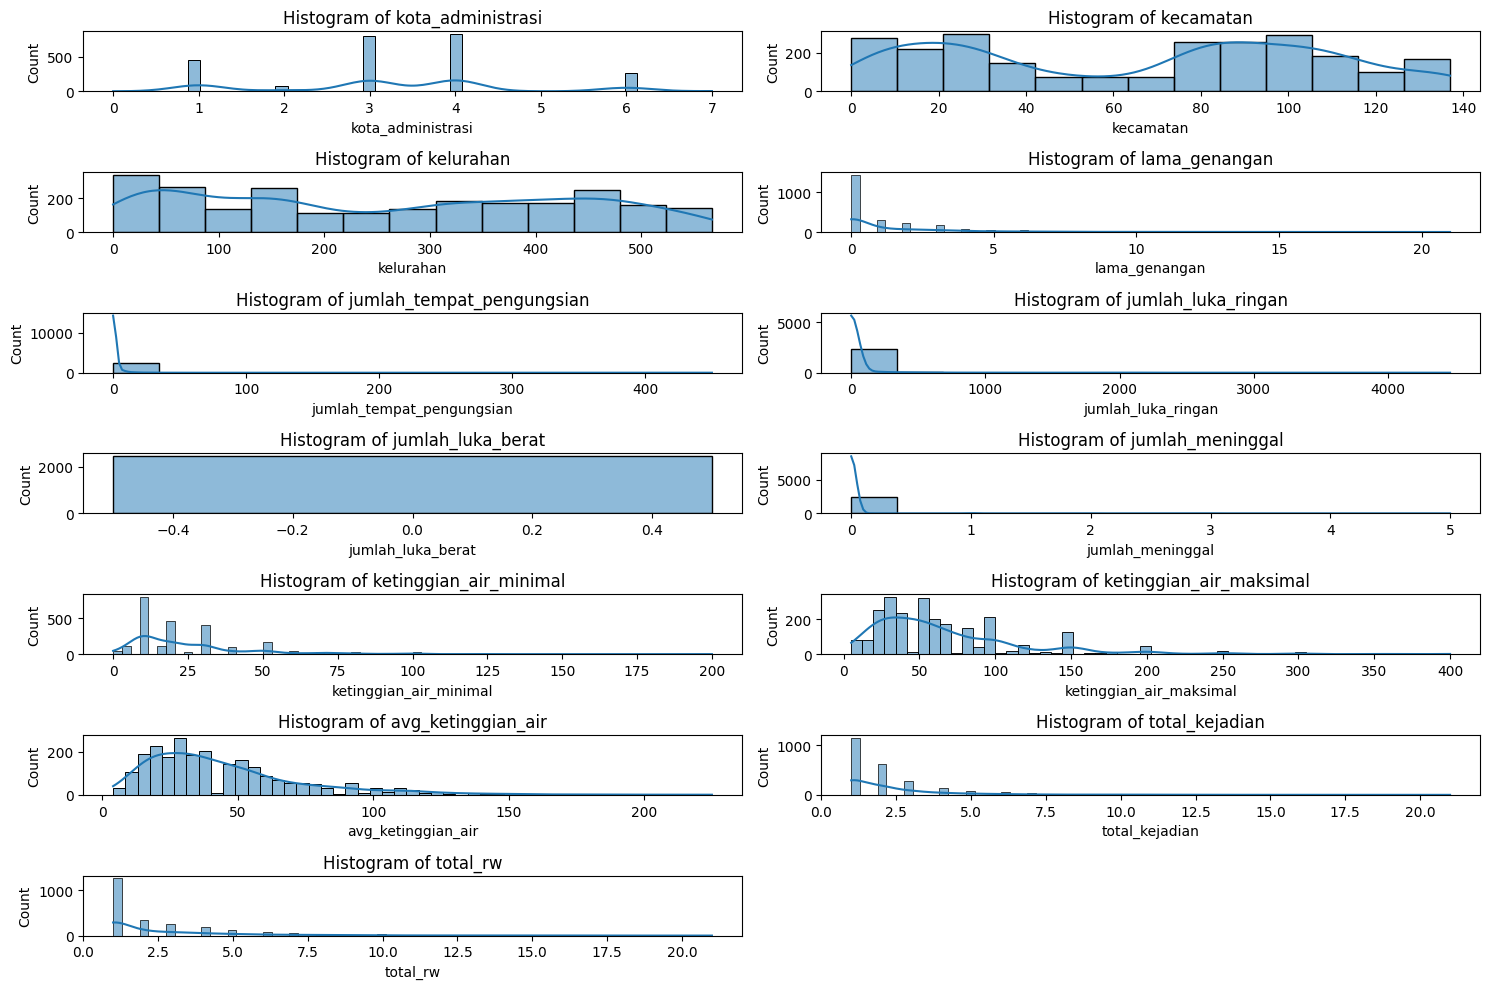

In [17]:
# Menghitung jumlah kolom dalam dataset
num_cols = len(df.columns)

# Menghitung jumlah baris dan kolom yang diperlukan untuk subplot
num_rows = num_cols // 2
if num_cols % 2 != 0:
    num_rows += 1

# Membuat subplot dengan ukuran yang sesuai
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1)  # Buat subplot
    sns.histplot(df[column], kde=True)  # Visualisasikan histogram dengan kernel density estimation
    plt.title(f'Histogram of {column}')  # Beri judul subplot

# Menampilkan plot
plt.tight_layout()
plt.show()

In [18]:
mm = MinMaxScaler()
scaled_features = mm.fit_transform(df)

## K-MEDOIDS CLUSTERING

In [20]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i)
    kmedoids.fit(scaled_features)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(scaled_features, kmedoids.labels_))

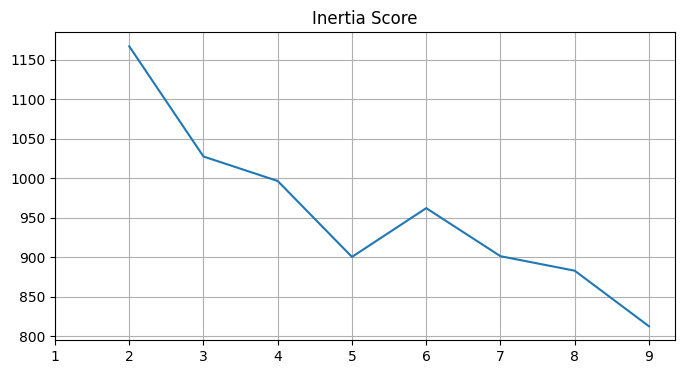

In [21]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

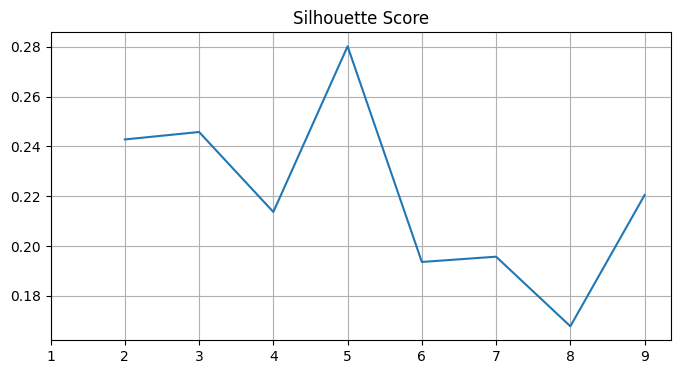

0.28025395560204985


In [23]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()
print(max(silh))

In [26]:
# Final decision on numbers of cluster chosen: 5

kmedoids = KMedoids(n_clusters = 5)
kmedoids.fit(df)
kmedoids_labels = kmedoids.labels_
cluster_centers = pd.DataFrame(data = kmedoids.cluster_centers_, columns = [df.columns])
cluster_centers

,kota_administrasi,kecamatan,kelurahan,lama_genangan,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,total_kejadian,total_rw
0,1.0,79.0,434.0,2.0,1.0,0.0,0.0,0.0,20.0,30.0,25.0,2.0,1.0
1,4.0,77.0,41.0,0.0,0.0,0.0,0.0,0.0,40.0,100.0,70.0,1.0,3.0
2,3.0,80.0,451.0,2.0,0.0,0.0,0.0,0.0,30.0,100.0,65.0,2.0,3.0
3,3.0,59.0,262.0,0.0,0.0,0.0,0.0,0.0,30.0,60.0,45.0,1.0,1.0
4,3.0,80.0,106.0,2.0,0.0,0.0,0.0,0.0,10.0,30.0,20.0,2.0,1.0


In [28]:
# Adding cluster column to dataframe
df_cluster_with_kmedoids = pd.concat([df, pd.DataFrame({'cluster': kmedoids_labels})], axis = 1)
df_cluster_with_kmedoids.sort_index()

,kota_administrasi,kecamatan,kelurahan,lama_genangan,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,total_kejadian,total_rw,cluster
0,4.0,26.0,22.0,13.0,95.0,0.0,0.0,1.0,20.0,250.0,135.0,13.0,11.0,1.0
1,4.0,26.0,305.0,13.0,69.0,0.0,0.0,5.0,30.0,400.0,215.0,13.0,8.0,2.0
2,4.0,88.0,57.0,9.0,27.0,0.0,0.0,0.0,30.0,260.0,145.0,9.0,8.0,1.0
3,4.0,88.0,70.0,10.0,40.0,0.0,0.0,0.0,40.0,300.0,170.0,10.0,5.0,1.0
4,4.0,88.0,14.0,3.0,17.0,0.0,0.0,0.0,30.0,150.0,90.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,7.0,75.0,412.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,12.5,1.0,1.0,NaN
2436,7.0,75.0,412.0,0.0,0.0,0.0,0.0,0.0,5.0,20.0,12.5,1.0,1.0,NaN
2437,7.0,75.0,412.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,1.0,1.0,NaN
2438,7.0,75.0,412.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,1.0,1.0,NaN


In [29]:
df_cluster_with_kmedoids['cluster'].value_counts()

4.0    546
3.0    530
0.0    513
1.0    458
2.0    388
Name: cluster, dtype: int64

In [32]:
df_cluster_with_kmedoids['cluster'].isna().sum()

5

In [35]:
df_cluster_with_kmedoids.isna().sum()

kota_administrasi            5
kecamatan                    5
kelurahan                    5
lama_genangan                5
jumlah_tempat_pengungsian    5
jumlah_luka_ringan           5
jumlah_luka_berat            5
jumlah_meninggal             5
ketinggian_air_minimal       5
ketinggian_air_maksimal      5
avg_ketinggian_air           5
total_kejadian               5
total_rw                     5
cluster                      5
dtype: int64

In [36]:
# Menghapus baris yang memiliki nilai yang hilang
df_cleaned = df_cluster_with_kmedoids.dropna()

In [38]:
df_cleaned.isna().sum()

kota_administrasi            0
kecamatan                    0
kelurahan                    0
lama_genangan                0
jumlah_tempat_pengungsian    0
jumlah_luka_ringan           0
jumlah_luka_berat            0
jumlah_meninggal             0
ketinggian_air_minimal       0
ketinggian_air_maksimal      0
avg_ketinggian_air           0
total_kejadian               0
total_rw                     0
cluster                      0
dtype: int64

In [39]:
df_cleaned.shape

(2430, 14)

In [40]:
df_cleaned.tail(50)

,kota_administrasi,kecamatan,kelurahan,lama_genangan,jumlah_tempat_pengungsian,jumlah_luka_ringan,jumlah_luka_berat,jumlah_meninggal,ketinggian_air_minimal,ketinggian_air_maksimal,avg_ketinggian_air,total_kejadian,total_rw,cluster
2385,4.0,22.0,145.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,15.0,1.0,1.0,1.0
2386,4.0,22.0,145.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,15.0,1.0,1.0,4.0
2387,4.0,22.0,145.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,15.0,1.0,1.0,4.0
2388,4.0,22.0,145.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,15.0,1.0,1.0,4.0
2389,4.0,77.0,5.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,1.0,1.0,0.0
2390,4.0,77.0,27.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,1.0,1.0,0.0
2391,4.0,77.0,27.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,1.0,1.0,0.0
2392,4.0,77.0,27.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,1.0,1.0,0.0
2393,4.0,104.0,96.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,1.0,1.0,0.0
2394,1.0,73.0,499.0,0.0,0.0,0.0,0.0,0.0,25.0,25.0,25.0,1.0,1.0,0.0


In [41]:
# Melihat data pada baris ke-2330
baris_ke_2310 = df_cleaned.iloc[2309]  # Ingatlah bahwa indeks dimulai dari 0

# Cetak data pada baris ke-2330
print(baris_ke_2310)

kota_administrasi              1.0
kecamatan                     29.0
kelurahan                    532.0
lama_genangan                  0.0
jumlah_tempat_pengungsian      0.0
jumlah_luka_ringan             0.0
jumlah_luka_berat              0.0
jumlah_meninggal               0.0
ketinggian_air_minimal        30.0
ketinggian_air_maksimal       60.0
avg_ketinggian_air            45.0
total_kejadian                 3.0
total_rw                       1.0
cluster                        4.0
Name: 2314, dtype: float64


In [42]:
# Menyimpan DataFrame ke file CSV
nama_file = "clustering-KMedoids.csv"  # Ganti dengan nama file yang Anda inginkan
df_cleaned.to_csv(nama_file, index=False)  # index=False agar indeks DataFrame tidak disimpan sebagai kolom